
[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.1 to 6.283185307179586
Generated 100 samples for mean -3.141592653589793 and std 0.1, min: -3.390796234383159, max: -2.8563028916670947
Generated 100 input values for mean -3.141592653589793 and std 0.1
Generated 100 cartesian products for mean -3.141592653589793 and std 0.1
Generated 100 samples for mean -3.141592653589793 and std 0.16245641724423826, min: -3.504145336243166, max: -2.662392659193681
Generated 100 input values for mean -3.141592653589793 and std 0.16245641724423826
Generated 100 cartesian products for mean -3.141592653589793 and std 0.16245641724423826
Generated 100 samples for mean -3.141592653589793 and std 0.2249128344884765, min: -3.7807146339739592, max: -2.6359560989075663
Generated 100 input values for mean -3.141592653589793 and std 0.2249128344884765
Generated 100 cartesian products for mean -3.141592653589793 and std 0.2249128344884765
Generated 100 samples for mean -3.141592653589793 and std 0.28736925173271477, min: -3.86337441443976, max

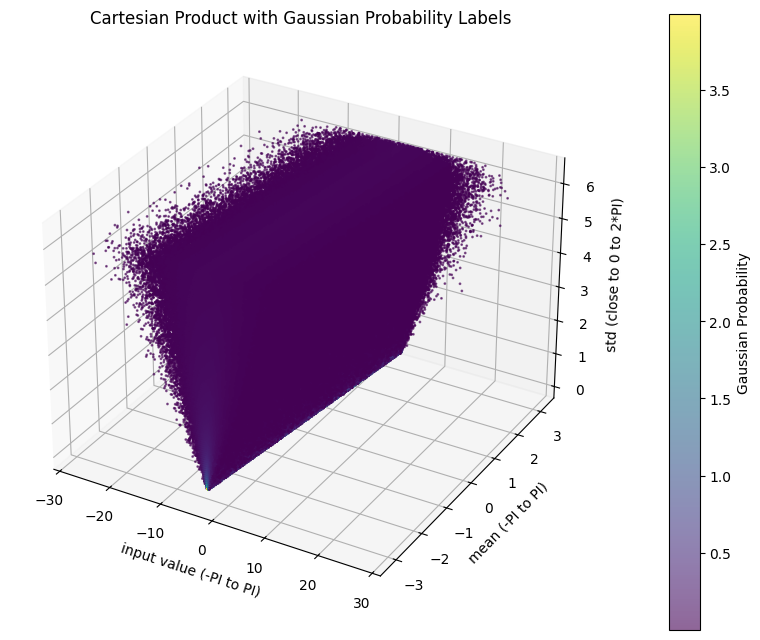

In [1]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100


# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.1
std = np.linspace(small_number, 2*np.pi, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-np.pi, np.pi, num_values)

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Maybe there is a better way than normal random samples to insure some low values are present, but this is a simple way
    samples = np.random.normal(m, s, num_values)
    print(f"Generated {len(samples)} samples for mean {m} and std {s}, min: {samples.min()}, max: {samples.max()}")
    inputval.extend(samples)
    print(f"Generated {len(inputval)} input values for mean {m} and std {s}")
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    print(f"Generated {len(cartesian_product_input)} cartesian products for mean {m} and std {s}")
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
labels.head()

0    3.677586
1    0.068162
2    3.393251
3    2.622822
4    3.970073
Name: Label, dtype: float64

In [3]:
labels.describe()

count    1.000000e+06
mean     2.026534e-01
std      3.983359e-01
min      2.742979e-09
25%      5.781012e-02
50%      8.841048e-02
75%      1.731999e-01
max      3.989423e+00
Name: Label, dtype: float64

In [4]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.93)

np.float64(0.5540777778220863)

(array([1.42879e+05, 3.02050e+05, 1.88485e+05, 9.41300e+04, 5.68010e+04,
        3.78000e+04, 2.70810e+04, 2.03050e+04, 1.55960e+04, 1.24930e+04,
        1.10400e+04, 8.23400e+03, 7.19400e+03, 6.34300e+03, 5.01800e+03,
        4.42300e+03, 4.78900e+03, 3.02000e+03, 3.99500e+03, 2.28700e+03,
        3.26100e+03, 2.19700e+03, 1.78600e+03, 2.37800e+03, 2.29300e+03,
        1.20400e+03, 1.33400e+03, 1.73200e+03, 2.35700e+03, 7.32000e+02,
        8.09000e+02, 9.31000e+02, 9.67000e+02, 1.23600e+03, 2.18200e+03,
        4.51000e+02, 4.73000e+02, 5.30000e+02, 5.37000e+02, 5.20000e+02,
        6.05000e+02, 6.82000e+02, 8.39000e+02, 1.08200e+03, 1.26700e+03,
        2.52000e+02, 2.39000e+02, 2.63000e+02, 2.60000e+02, 2.59000e+02,
        2.66000e+02, 3.01000e+02, 2.76000e+02, 2.83000e+02, 3.14000e+02,
        4.00000e+02, 3.52000e+02, 4.08000e+02, 4.82000e+02, 5.71000e+02,
        7.61000e+02, 1.18200e+03, 7.50000e+01, 7.70000e+01, 8.70000e+01,
        1.07000e+02, 8.00000e+01, 1.04000e+02, 9.40

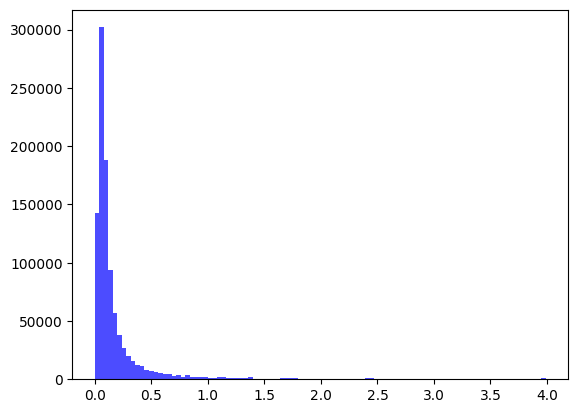

In [5]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [6]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.4070581744621465)

In [7]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [8]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_data_second.csv")
test_file = os.path.join(output_folder, "test_data_second.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train dataset saved to ./train_data_second.csv
Test dataset saved to ./test_data_second.csv


In [9]:
train_df["Label"].describe()

count    8.000000e+05
mean     2.023359e-01
std      3.973050e-01
min      2.742979e-09
25%      5.779322e-02
50%      8.836898e-02
75%      1.731491e-01
max      3.989423e+00
Name: Label, dtype: float64

In [10]:
test_df["Label"].describe()

count    2.000000e+05
mean     2.039235e-01
std      4.024319e-01
min      7.658065e-07
25%      5.788775e-02
50%      8.856959e-02
75%      1.733589e-01
max      3.989420e+00
Name: Label, dtype: float64

In [11]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 16466
Non-outlier observations: 783534
count    7.835340e+05
mean     1.553498e-01
std      1.988770e-01
min      2.742979e-09
25%      5.710825e-02
50%      8.665482e-02
75%      1.634794e-01
max      1.394182e+00
dtype: float64


np.float64(0.08665481972603867)

In [12]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 22340
Non-outlier observations: 761194


In [13]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.611940e+05
mean     1.297415e-01
std      1.290159e-01
min      2.742979e-09
25%      5.610757e-02
50%      8.434414e-02
75%      1.519754e-01
max      7.519771e-01
dtype: float64

(array([14753., 18565., 21224., 23887., 26929., 30816., 35582., 43063.,
        60570., 53147., 43621., 36227., 30841., 26505., 22657., 19992.,
        17562., 15845., 14150., 12740., 11269., 10568.,  9245.,  8977.,
         7756.,  7592.,  7022.,  6161.,  5829.,  5539.,  5312.,  5054.,
         4211.,  4347.,  4282.,  4177.,  3088.,  3684.,  3167.,  3071.,
         2878.,  2825.,  2509.,  2683.,  2144.,  2779.,  1760.,  2277.,
         2183.,  1677.,  2143.,  1854.,  1476.,  1700.,  2027.,  1186.,
         1363.,  1748.,  1591.,  1144.,  1211.,  1353.,  1609.,   874.,
          973.,  1092.,  1223.,  1420.,   729.,   768.,   876.,   936.,
         1160.,  1087.,   616.,   657.,   684.,   759.,   852.,  1184.,
          809.,   490.,   541.,   561.,   594.,   616.,   731.,   914.,
         1038.,   393.,   400.,   411.,   452.,   502.,   465.,   565.,
          581.,   669.,  1100.,   325.]),
 array([2.74297884e-09, 7.51977399e-03, 1.50395452e-02, 2.25593165e-02,
        3.00790877e-02

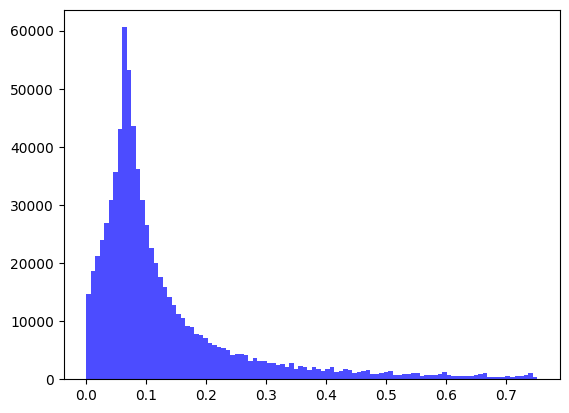

In [14]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')